In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = 'ncIYApS06S4k8VpBrqUYOk8wb'
consumer_secret = 'oR5HNsL6twBliSlTLojB8a63jcqh2WnfsCySZ9mzd64voAGrSA'
access_token = '25749595-JC72urBHJsrwxFHRMiRjvayKDJIHQvxbNwzNob6TT'
access_token_secret = '4pH5dgPAXzx3dMP5HMudZzDciv4iVnizYcFXGgT3HnaHQ'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
tweet_txt=[]
compound_tweet=[]
tweet_date=[]
retweet_cnt=[]
fvt_cnt=[]
for x in range(0, 150):
    public_tweets = api.user_timeline('tim_cook', page=x)
        
    for tweet in public_tweets:

            # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        date=tweet['created_at']
        txt=tweet['text']
        fvt=tweet['favorite_count']
        retweet=tweet['retweet_count']
            # saving values
        compound_tweet.append(compound)
        tweet_txt.append(txt)
        tweet_date.append(date)
        retweet_cnt.append(retweet)
        fvt_cnt.append(retweet)


In [4]:
#creating dictionary 
results = {
    "Date":tweet_date,
    "Text":tweet_txt,
    "Retweet Count":retweet_cnt,
    "Favorite Count":fvt_cnt,
    "Compound": compound_tweet
}

tweets=pd.DataFrame(results)
tweets

,Compound,Date,Favorite Count,Retweet Count,Text
0,0.8591,Wed Apr 18 00:10:33 +0000 2018,613,613,"Throughout her life, Barbara Bush showed us al..."
1,0.0000,Mon Apr 09 22:57:32 +0000 2018,17236,17236,"Every Apple store, every data center, every Ap..."
2,0.3818,Mon Apr 09 13:30:21 +0000 2018,2266,2266,Thanks to Apple customers around the world for...
3,-0.8126,Sat Apr 07 16:30:19 +0000 2018,1196,1196,Our hearts go out to the victims in Münster an...
4,0.6114,Sat Apr 07 04:42:04 +0000 2018,1125,1125,"Apple loves Tokyo and our customers, employees..."
5,0.7096,Wed Apr 04 20:30:56 +0000 2018,354,354,Great visit @LawsonStateCC. Alabama’s @ACCS_Ed...
6,0.4404,Wed Apr 04 18:10:06 +0000 2018,435,435,"Full of hope this morning, hearing from hundre..."
7,0.8689,Wed Apr 04 16:50:33 +0000 2018,1268,1268,It’s an honor to be in Birmingham celebrating ...
8,0.3862,Tue Apr 03 21:52:26 +0000 2018,7348,7348,"From everyone at Apple, we send our sympathy a..."
9,0.9517,Sun Apr 01 14:05:28 +0000 2018,1384,1384,Wishing a #HappyEaster to people everywhere. M...


In [5]:
for date in tweets['Date']:
   dt=datetime.datetime.strptime(date, "%a %b %d %H:%M:%S %z %Y")

In [6]:
apple_tweets=tweets[tweets['Text'].str.contains('Apple')]
apple_tweets

,Compound,Date,Favorite Count,Retweet Count,Text
1,0.0000,Mon Apr 09 22:57:32 +0000 2018,17236,17236,"Every Apple store, every data center, every Ap..."
2,0.3818,Mon Apr 09 13:30:21 +0000 2018,2266,2266,Thanks to Apple customers around the world for...
4,0.6114,Sat Apr 07 04:42:04 +0000 2018,1125,1125,"Apple loves Tokyo and our customers, employees..."
8,0.3862,Tue Apr 03 21:52:26 +0000 2018,7348,7348,"From everyone at Apple, we send our sympathy a..."
21,0.0000,Mon Apr 09 22:57:32 +0000 2018,17236,17236,"Every Apple store, every data center, every Ap..."
22,0.3818,Mon Apr 09 13:30:21 +0000 2018,2266,2266,Thanks to Apple customers around the world for...
24,0.6114,Sat Apr 07 04:42:04 +0000 2018,1125,1125,"Apple loves Tokyo and our customers, employees..."
28,0.3862,Tue Apr 03 21:52:26 +0000 2018,7348,7348,"From everyone at Apple, we send our sympathy a..."
43,0.4939,Sat Feb 24 16:53:46 +0000 2018,15452,15452,"Remembering Steve, our friend and leader, on h..."
48,0.6580,Fri Feb 09 21:08:22 +0000 2018,1028,1028,"Hey Siri, play my weekend playlist! Excited to..."


In [7]:
daily_dt=pd.to_datetime(apple_tweets['Date']).dt.to_period('d')
monthly_dt=pd.to_datetime(apple_tweets['Date']).dt.to_period('m')
yearly_dt=pd.to_datetime(apple_tweets['Date']).dt.to_period('y')

In [8]:
apple_tweets["Daily Date"]=daily_dt
apple_tweets["Monthly Date"]=monthly_dt
apple_tweets["Yearly Date"]=yearly_dt

C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [9]:
sort=apple_tweets.sort_values('Compound', ascending= True)
sort.head(100
         )

,Compound,Date,Favorite Count,Retweet Count,Text,Daily Date,Monthly Date,Yearly Date
182,-0.5574,Fri Jun 02 00:36:46 +0000 2017,15338,15338,Decision to withdraw from the #ParisAgreeement...,2017-06-02,2017-06,2017
419,-0.5256,Fri Mar 27 17:56:44 +0000 2015,13660,13660,Apple is open for everyone. We are deeply disa...,2015-03-27,2015-03,2015
130,-0.3818,Tue Sep 05 18:33:23 +0000 2017,13046,13046,#Dreamers contribute to our companies and our ...,2017-09-05,2017-09,2017
264,-0.1027,Thu Oct 13 10:15:18 +0000 2016,2536,2536,Just rode JRE's Yamanote line with Apple Pay. ...,2016-10-13,2016-10,2016
1,0.0000,Mon Apr 09 22:57:32 +0000 2018,17236,17236,"Every Apple store, every data center, every Ap...",2018-04-09,2018-04,2018
142,0.0000,Thu Aug 24 19:46:43 +0000 2017,386,386,Looking forward to working with @KimReynoldsIA...,2017-08-24,2017-08,2017
160,0.0000,Thu Jun 29 16:41:04 +0000 2017,16789,16789,"Here's to the #iPhone that changed the world, ...",2017-06-29,2017-06,2017
171,0.0000,Sun Jun 11 20:54:44 +0000 2017,2670,2670,"Here comes Apple Taipei 101, our first store i...",2017-06-11,2017-06,2017
98,0.0000,Wed Nov 01 19:23:20 +0000 2017,2117,2117,Gotta wait til Friday! Meet me at the Apple St...,2017-11-01,2017-11,2017
209,0.0000,Sat Mar 25 16:34:12 +0000 2017,700,700,"RT @RED: ""Keeping inc(red)ible company... Appl...",2017-03-25,2017-03,2017


In [10]:
Daily_avg=apple_tweets.groupby('Daily Date')['Compound'].mean()
Daily_dataframe=pd.DataFrame({'Daily Comp Score':Daily_avg})
Daily_dataframe.plot(kind='line',y='Daily Comp Score' ,linestyle='None', marker='o',figsize=(10,10))

In [11]:
Monthly_avg=apple_tweets.groupby('Monthly Date')['Compound'].mean()
Monthly_dataframe=pd.DataFrame({'Monthly Comp Score':Monthly_avg})
Monthly_dataframe.plot(kind='line',y='Monthly Comp Score' ,linestyle='None', marker='o',figsize=(10,10))

In [12]:
bins = [-1.0,-0.5,0,0.5,1.0]

# Create labels for these bins
group_labels = ["Really Pessimistic","Mildy mad","having a nice day",
                "totally chilled"]
group= ['-1.0 to -0.5','-0.5 to 0.0','0.0 to 0.5','0.5 to 1.0']

In [13]:
Daily_dataframe['Comp Group']= pd.cut(Daily_dataframe["Daily Comp Score"],bins,labels=group)
d=Daily_dataframe.groupby('Comp Group').count()
d

,Daily Comp Score
Comp Group,
-1.0 to -0.5,2
-0.5 to 0.0,14
0.0 to 0.5,20
0.5 to 1.0,83


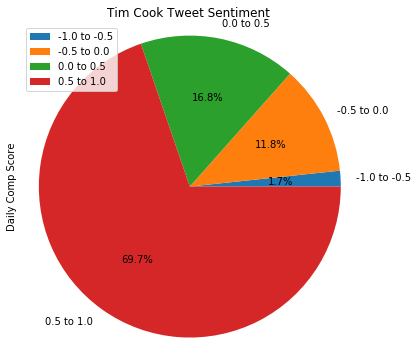

In [17]:
d.plot(kind='pie', y='Daily Comp Score', autopct= '%1.1f%%', use_index=None, figsize=(6,6))
plt.axis('equal')
plt.title('Tim Cook Tweet Sentiment')
plt.show()

In [15]:
tweets.to_csv("cook.csv", index=False, header=True)

TypeError: pie() missing 1 required positional argument: 'x'